<a href="https://colab.research.google.com/github/rajgit-123/MyProject/blob/master/BharathK_Karupotula_Submission_6_Assign3_multiregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Multi Regression Problem



The "Auto MPG" dataset from the UCI Machine Learning Repository. This dataset is used to predict the miles per gallon (mpg) of a car based on its other attributes. It contains both continuous and categorical variables.

You can download the dataset from here.

The dataset contains the following attributes:


**cylinders:** multi-valued discrete
**displacement:** continuous
**horsepower:** continuous
**weight:** continuous
**acceleration:** continuous
**model year:** multi-valued discrete
**origin:** multi-valued discrete
**car name:** string (unique for each instance)

The **target variable (y)**  is **mpg** (miles per gallon).

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Loading csv file and creating a dataframe
- The loading_dataset function is designed to load a dataset from a CSV file into a pandas DataFrame. This function has the ability to handle datasets where values are separated by spaces rather than commas, as indicated by the delim_whitespace=True argument.
- This DataFrame, df, is then returned as the output of the function.

In [ ]:
def loading_dataset(file, names):
  '''
  This function loads a dataset from a CSV file into a pandas DataFrame.

  Parameters:
  file (str): The URL or local path of the CSV file to load. The CSV file should be in a format that can be read by pandas.read_csv().
  names (list of str): A list of strings that will be used as column names for the DataFrame. The length of this list should match the number of columns in the CSV file.

  Returns:
  pandas.DataFrame: A DataFrame containing the data from the CSV file, with columns named according to the 'names' list.

  '''


In [ ]:
### Url to load data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
### column names
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

###df = loading_dataset(____, names=____)

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive', force_remount=True)
file_path='/content/drive/MyDrive/auto-mpg.csv'
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

df =pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
### check the head of dataframe

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### Finding percentage of null values
- The function percent_null is designed to compute and display the percentage of null or missing values in each column of a given pandas DataFrame.

In [ ]:
def percent_null(df):
  '''
  This function calculates and prints the percentage of null values in each column of a pandas DataFrame.

  Parameters:
  df (pandas.DataFrame): The DataFrame for which to calculate the percentage of null values.

  Returns:
  None. However, this function will print to the console a pandas Series where the index is the column names of the DataFrame and the values are the percentage of null values in each column.

  '''


In [ ]:
def percent_null(df):
  percentage_ofnull=(df.isnull().sum()*100)/len(df)
  return percentage_ofnull
print(percent_null(df))
###print(df)

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model year      0.0
origin          0.0
car name        0.0
dtype: float64


### Preprocess data
- The preprocess_data function is designed to perform several preprocessing tasks on a given pandas DataFrame. Specifically, it targets the DataFrame's 'horsepower' column for conversion to numeric values, checks and prints the percentage of null values in each column, and eliminates rows containing null values.

In [ ]:
def preprocess_data(df):
  '''
  This function preprocesses a pandas DataFrame by converting the 'horsepower' column to numeric values, printing the percentage of null values in each column, and dropping rows with null values.

  Steps:
  1. Convert the 'horsepower' column to numeric values using pandas to_numeric function. Non-numeric values are set to NaN.
  2. Use the percent_null function to calculate and print the percentage of null values in each column of the DataFrame.
  3. Drop rows with null values using the dropna function.

  Parameters:
  df (pandas.DataFrame): The DataFrame to preprocess. This DataFrame should have a 'horsepower' column.

  Returns:
  pandas.DataFrame: The preprocessed DataFrame, with the 'horsepower' column converted to numeric values and rows with null values dropped.

  '''


In [ ]:
# preprocess our dataframe
###df = preprocess_data(______)


In [ ]:
def preprocess_data(df):
  df['horsepower'] = pd.to_numeric(df['horsepower'], errors="coerce")
  return df
  #print(df.shape[0],';;;;;;;;;;;;')

df =  preprocess_data(df)
percent_null(df)
df.dropna(inplace=True)

print(df)
###df = preprocess_data(df)

### Processing categorical variables
- The function process_categorical performs preprocessing on a pandas DataFrame by converting categorical features into one-hot encoded vectors.
- The output of this function is the preprocessed DataFrame, with the categorical features now converted into one-hot encoded vectors.

In [ ]:
def process_categorical(df):
  '''
  This function preprocesses a pandas DataFrame by converting the categorical features into one-hot encoded vectors.

  Steps:
  1. Identify the categorical features in the DataFrame.
  2. Use the pandas get_dummies function to convert these categorical features into one-hot encoded vectors.
  3. This creates a new binary column for each category/label present in the original columns.

  Parameters:
  df (pandas.DataFrame): The DataFrame to preprocess. This DataFrame should have 'cylinders', 'model year', 'origin', and 'car name' columns.

  Returns:
  pandas.DataFrame: The preprocessed DataFrame, with the categorical features converted to one-hot encoded vectors.


  '''


In [ ]:
###df = process_categorical(_____)

In [ ]:
def process_categorical(df):
  categorical_features=['cylinders', 'model year', 'origin', 'car name']
  one_hot_df = pd.get_dummies(df,columns=categorical_features)
  return one_hot_df

###print(process_categorical(df))
df=process_categorical(df)
df.head()


,mpg,displacement,horsepower,weight,acceleration,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,...,car name_volvo 145e (sw),car name_volvo 244dl,car name_volvo 245,car name_volvo 264gl,car name_volvo diesel,car name_vw dasher (diesel),car name_vw pickup,car name_vw rabbit,car name_vw rabbit c (diesel),car name_vw rabbit custom
0,18.0,307.0,130.0,3504,12.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,15.0,350.0,165.0,3693,11.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,18.0,318.0,150.0,3436,11.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,16.0,304.0,150.0,3433,12.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,17.0,302.0,140.0,3449,10.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### Splitting dataset to train and test
-  Write a function to split pandas DataFrame into a training set and a test set, separating features from the target variable 'Sales', and allowing for a customizable ratio for the test set size

In [ ]:
def splitting_dataset(df, split_ratio = 0.2):
  '''
  This function splits a pandas DataFrame into training and testing sets for the purposes of model training and evaluation.

  Steps:
  1. Define the feature matrix X and the target variable y. In this case, 'mpg' is the target and all other columns are considered features.
  2. Use the sklearn's train_test_split function to split the feature matrix and target variable into training and testing sets. The split ratio defines the proportion of the dataset to include in the test split. The random state ensures that the splits generate are reproducible.

  Parameters:
  df (pandas.DataFrame): The DataFrame to split. This DataFrame should have a 'mpg' column which will be used as the target variable.
  split_ratio (float): The proportion of the dataset to include in the test split. Default is 0.2.

  Returns:
  X_train (pandas.DataFrame): The feature matrix for the training set.
  X_test (pandas.DataFrame): The feature matrix for the test set.
  y_train (pandas.Series): The target variable for the training set.
  y_test (pandas.Series): The target variable for the test set.
  '''



In [ ]:
from sklearn.model_selection import train_test_split

def splitting_dataset(df, split_ratio = 0.2):
  X=df.drop(columns=['mpg'])
  y=df['mpg']
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_ratio, random_state=42)
  print("X:",X.shape)
  print("y:",y.shape)
  print("X_train:",X_train.shape)
  print("X_test:",X_test.shape)
  print("y_train:",y_train.shape)
  print("y_test:",y_test.shape)
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = splitting_dataset(df, split_ratio = 0.2)


X: (392, 326)
y: (392,)
X_train: (313, 326)
X_test: (79, 326)
y_train: (313,)
y_test: (79,)


### Splitting dataset
- Employ the splitting_dataset function to partition the dataset into training and testing subsets.

In [ ]:
###X_train, X_test, y_train, y_test = splitting_dataset(_____)


### Model fitting
- The sklearn_multi_regression function is designed to implement a multiple linear regression model utilizing sklearn's LinearRegression. The function initiates a LinearRegression model and fits it on the supplied feature matrix and target variable. This function accepts a feature matrix (x) and a target variable (y), both of which can either be pandas.DataFrame or numpy.ndarray.
- The function returns a fitted LinearRegression model, which can be employed to make predictions on new data or to examine the coefficients and intercept of the fitted model.

In [ ]:
def sklearn_multi_regression(x,y):
  '''
  This function fits a multiple linear regression model using sklearn's LinearRegression.

  Steps:
  1. Initialize a LinearRegression model.
  2. Fit the model on the provided feature matrix and target variable.

  Parameters:
  x (pandas.DataFrame or numpy.ndarray): The feature matrix. Each row represents an observation, and each column represents a feature.
  y (pandas.Series or numpy.ndarray): The target variable. Each element represents the target value for the corresponding observation in the feature matrix.

  Returns:
  sklearn.linear_model._base.LinearRegression: The fitted LinearRegression model. This model can be used to make predictions on new data, or to inspect the coefficients and intercept of the fitted model.
  '''



In [ ]:
def sklearn_multi_regression(x,y):
  print("innnnnnnnnnnnn on model")
  model=LinearRegression()
  print("innnnnnnnnnnnn dwon model")
  model.fit(x,y)

  print("innnnnnnnnnnnn after model")
  return model


### Find the model performance in test data
The performance function is designed to assess the performance of a fitted regression model using a test dataset.

The function works in the following steps:

1. It uses the fitted model to generate predictions on the test dataset.
2. It calculates the mean squared error (MSE) and the coefficient of determination (R^2 score) between the actual and predicted target values.
3. It prints the MSE and R^2 score, rounded to two decimal places, to the console.

In [ ]:
def performance(model, x_test, y_test):
  '''
  This function evaluates the performance of a fitted regression model on a test dataset.

  Steps:
  1. Use the fitted model to make predictions on the test dataset.
  2. Compute the mean squared error (MSE) and the coefficient of determination (R^2 score) between the true and predicted target values.
  3. Print the MSE and R^2 score to the console, rounded to two decimal places.

  Parameters:
  model (sklearn estimator): The fitted regression model to evaluate. This model should have a predict method that accepts a feature matrix and returns a vector of predicted target values.
  x_test (pandas.DataFrame or numpy.ndarray): The feature matrix for the test dataset. Each row represents an observation, and each column represents a feature.
  y_test (pandas.Series or numpy.ndarray): The true target values for the test dataset. Each element represents the true target value for the corresponding observation in the feature matrix.

  Returns:
  None. However, this function will print the MSE and R^2 score to the console when called.
  '''




In [ ]:
def performance(model, x_test, y_test):
  pred=model.predict(X_test)
  mse=mean_squared_error(y_test,pred)
  r2 = r2_score(y_test,pred)
  print(mse)
  print(r2)
  return pred, mse, r2

splitting_dataset(df, split_ratio = 0.2)

In [ ]:
multi_reg = sklearn_multi_regression(_____,_______)
performance(_____, ______, _______)

In [ ]:
#X_train, X_test, y_train, y_test = splitting_dataset(df, split_ratio = 0.2)
#print(X_train, y_train,'lllllllllllllllllllllhhhh')
multi_reg = sklearn_multi_regression(X_train, y_train)
performance(multi_reg, X_test, y_test)

### Finding model coefficient
The function 'model_coefficients'to create a DataFrame that includes the feature names and corresponding coefficients.

The function proceeds in the following manner:


- A new DataFrame is created that includes two columns - 'features' and 'coefficients'. The 'features' column is filled with the feature names, and the 'coefficients' column is filled with the corresponding coefficients.
- The function ultimately returns this DataFrame.

In [ ]:
def model_coefficients(model, feature_names):
  '''
  This function extracts the coefficients of a fitted regression model and returns them in a pandas DataFrame.

  Steps:
  1. Extract the coefficients of the fitted model. The order of the coefficients matches the order of the features in the feature matrix used to fit the model.
  2. Create a pandas DataFrame where one column is the feature names and the other column is the corresponding coefficients.

  Parameters:
  model (sklearn estimator): The fitted regression model. This model should have a coef_ attribute that returns a vector of coefficients.
  feature_names (list of str): The names of the features. The order of the names should match the order of the features in the feature matrix used to fit the model.

  Returns:
  pandas.DataFrame: A DataFrame where one column is the feature names and the other column is the corresponding coefficients. Each row represents a feature and its coefficient.
  '''



In [ ]:
def model_coefficients(model,feature_names):
  coefficients=model.coef_
  coef_df=pd.DataFrame({'Feature':feature_names,'coefficients':coefficients})
  print(coef_df)
  return coef_df


In [ ]:
coef_df = model_coefficients(_____, ________)

In [ ]:
names = df.columns.tolist()
names = names[1:]
coef_df = model_coefficients(multi_reg, names)
print(coef_df)

### Sort the coefficient dataframe (highest coefficient first)
- The sort_df function is used to sort a given pandas DataFrame (df) in descending order based on a specified feature or column (feature).
- The function returns the input DataFrame sorted in descending order based on the specified feature or column.

In [ ]:
def sort_df(df, feature):
  '''
  This function sorts a pandas DataFrame in descending order based on a specified feature.

  Steps:
  1. Sort the DataFrame in descending order based on the given feature.

  Parameters:
  df (pandas.DataFrame): The DataFrame to sort.
  feature (str): The name of the feature to sort the DataFrame by.

  Returns:
  pandas.DataFrame: The sorted DataFrame in descending order based on the specified feature.

  '''



In [ ]:
def sort_df(df, feature):
  df=pd.DataFrame(df)
  sorted_df=df.sort_values(by=feature,ascending=False)
  return sorted_df

In [ ]:
sorted_coef_df = sort_df(_____, "coefficients")
# check first 10 values
sorted_coef_df.head(___)

In [ ]:
sorted_coef_df = sort_df(coef_df,"coefficients")
sorted_coef_df.head()

### Plotting the model top 10 coefficients
- The function plotting_top_10_coefficients is designed to create a bar plot representing the top 10 coefficients of a model.

In [ ]:
def plotting_top_10_coefficients(df):
  '''
  This function plots a bar chart of the model coefficients for the top 10 features with the highest importance.

  Steps:
  1. Create a bar chart using matplotlib to visualize the coefficients of top 10 features.
  2. Display the bar chart.

  Parameters:
  df (pandas.DataFrame): The DataFrame containing the feature names and corresponding model coefficients.

  Returns:
  None. However, this function will display the bar chart when called.


  '''


In [ ]:
def plotting_top_10_coefficients(df):
  top_10 = df #sorted_coef_df.head(10)
  plt.figure(figsize=(10,6))
  plt.bar(top_10['Feature'], top_10['coefficients'], color='blue')
  plt.xlabel('Feature')
  plt.ylabel('coefficients')
  plt.title('Top 10 Coefficients')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

In [ ]:
##plotting_top_10_coefficients(______)

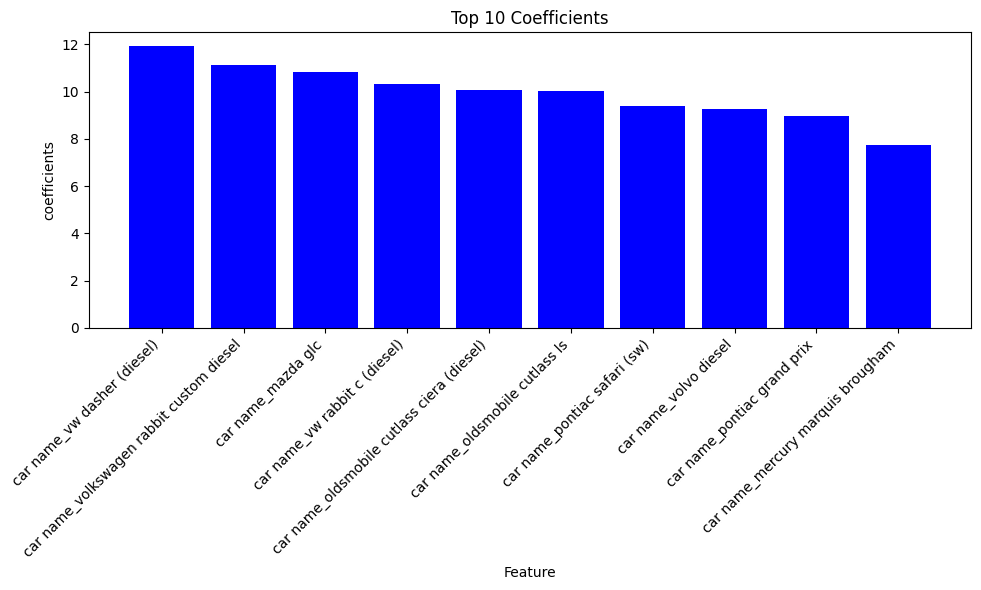

In [ ]:
plotting_top_10_coefficients(sorted_coef_df.head(10))

## Questions

From the analysis you have done above answer the following questions given below:

1. Find the top 10 features with positive impact and top 10 features with negative impact? Do you think the car models play an important role in prediction based on your observation?



